# Import libraries

In [121]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load the dataset

In [124]:
df = pd.read_csv("Customer Churn Prediction.csv")

In [126]:
df.head()

,Customer_Age,Annual_Income,Years_with_Company,Purchase_Frequency,Avg_Spend_Per_Purchase,Subscribed_to_Loyalty_Program,Churn
0,56,128737,2,7,868,Yes,No
1,69,101061,7,10,4918,No,No
2,46,43398,2,16,62,No,No
3,32,118393,13,3,4029,Yes,Yes
4,60,70861,27,10,970,No,No


# Encode Binary Variables
##### Automatically detect object-type columns and encode them

In [129]:
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    if df[column].nunique() <= 2:  # Binary variable
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le


# Assuming target variable is named 'Churn' (change if different)
Define Features (X) and Target (y)

In [132]:
target_col = 'Churn'
X = df.drop(target_col, axis=1)
y = df[target_col]

#  Split Data



In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#  Train Decision Tree



In [138]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

#  Predictions

In [141]:
y_pred = clf.predict(X_test)

#  Accuracy


In [144]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.562

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.68      0.68       343
           1       0.31      0.31      0.31       157

    accuracy                           0.56       500
   macro avg       0.49      0.49      0.49       500
weighted avg       0.56      0.56      0.56       500



# Decision Tree in Text Form


In [147]:
tree_rules = export_text(clf, feature_names=list(X.columns))
print("\nDecision Tree Rules:\n", tree_rules)


Decision Tree Rules:
 |--- Annual_Income <= 148695.50
|   |--- Annual_Income <= 53388.50
|   |   |--- Purchase_Frequency <= 10.50
|   |   |   |--- Annual_Income <= 52788.00
|   |   |   |   |--- Customer_Age <= 33.50
|   |   |   |   |   |--- Annual_Income <= 28922.00
|   |   |   |   |   |   |--- Annual_Income <= 28254.00
|   |   |   |   |   |   |   |--- Avg_Spend_Per_Purchase <= 4408.50
|   |   |   |   |   |   |   |   |--- Avg_Spend_Per_Purchase <= 210.00
|   |   |   |   |   |   |   |   |   |--- Purchase_Frequency <= 5.00
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- Purchase_Frequency >  5.00
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- Avg_Spend_Per_Purchase >  210.00
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- Avg_Spend_Per_Purchase >  4408.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- Annual_Income >  28254.00
|   |   

# Visualize Decision Tree (Graphical)

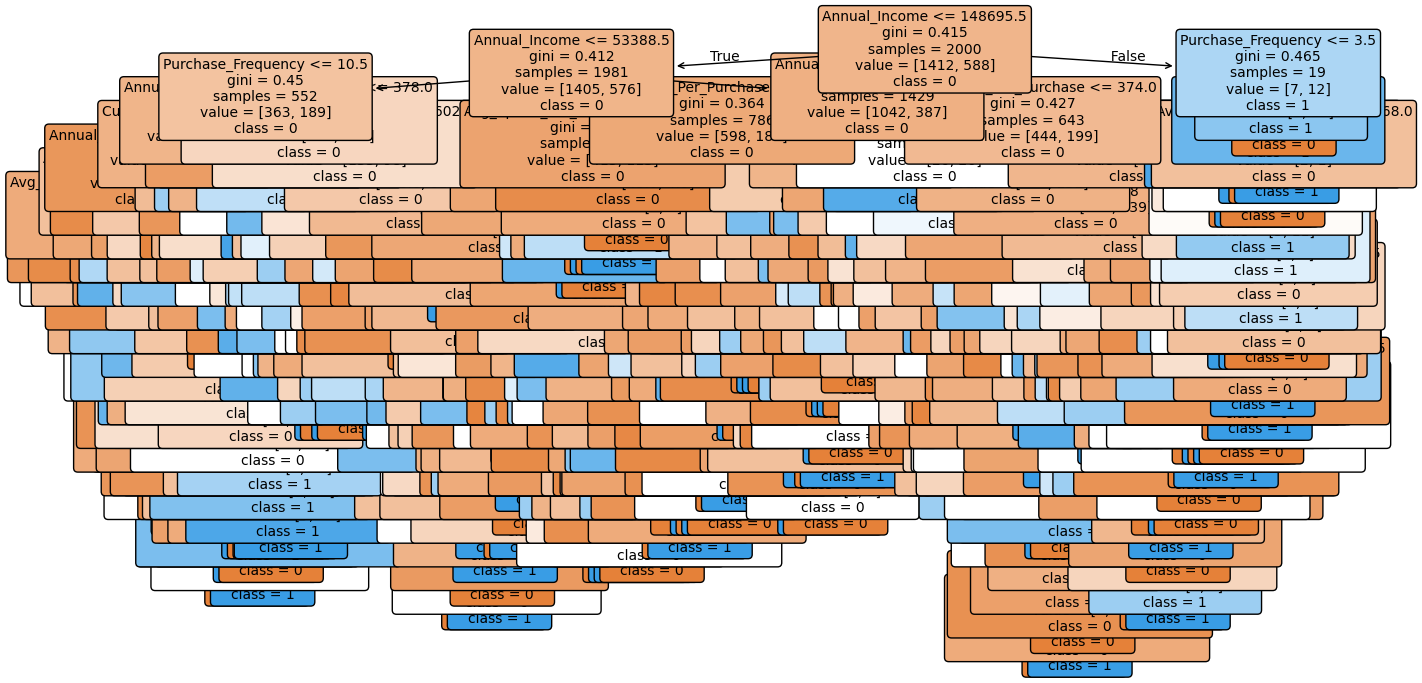

In [155]:
plt.figure(figsize=(15, 8))
plot_tree(
    clf,
    feature_names=X.columns,
    class_names=[str(c) for c in clf.classes_],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()